In [1]:
#import packages
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


/home/vineet/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


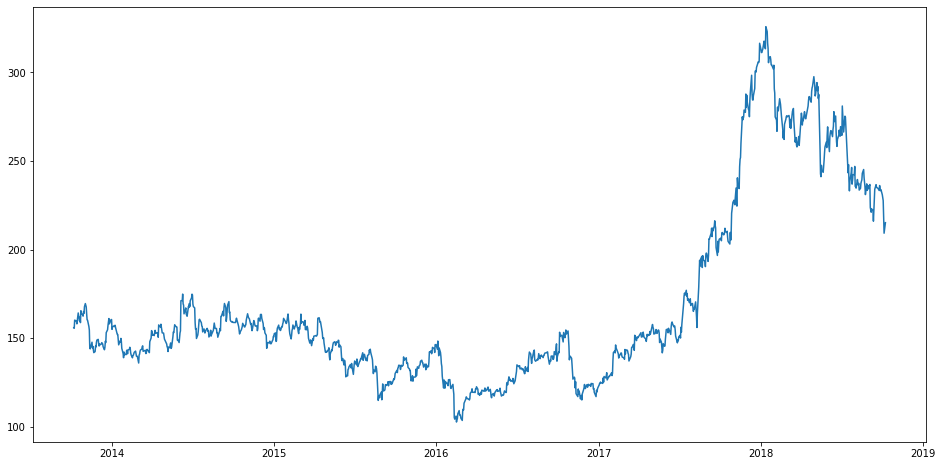

In [4]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [25]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Open', 'Close'])

for i in range(0,len(data)):
    new_data['Open'][i] = data['Open'][i]
    new_data['Close'][i] = data['Close'][i]

In [26]:
new_data.head()

,Open,Close
0,157,155.8
1,155.7,155.55
2,156,160.15
3,161.15,160.05
4,160.85,159.45


In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [28]:
labels = new_data['Close']

In [29]:
train1 = new_data.drop(['Close'],axis=1)

In [30]:
train1.shape

(1235, 1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [33]:
x_train.shape

(1111, 1)

In [34]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg.score(x_test,y_test)

0.9935107327407988

In [36]:
preds = reg.predict(x_test)

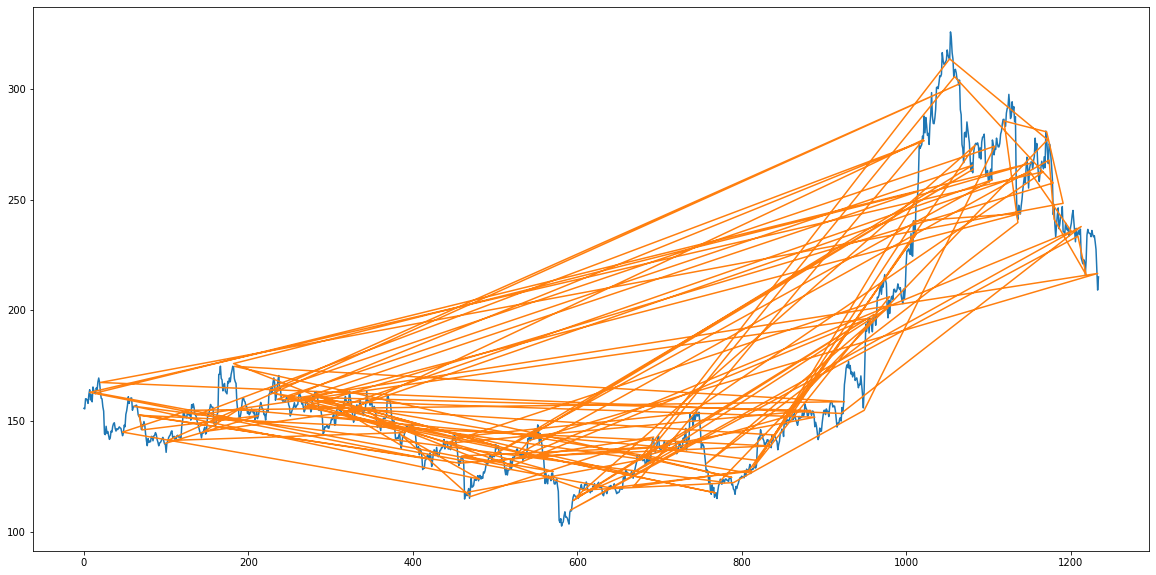

In [43]:
valid = pd.DataFrame()
valid['Close'] = y_test
valid['Predictions'] = preds
plt.plot(labels)
plt.plot(valid[['Predictions']])